In [1]:
#%matplotlib inline
%matplotlib notebook

import matplotlib as mpl
mpl.__version__

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 10))
#print colors

In [3]:
#
# 1 / 1.5 = 0.67 (QoS)
#
def genBar(app1, app2, xlbls, figname = None, title = None, QoS=0.8, adjustTitle = False, title_xloc = 5.8, title_yloc = 1.12):
    n_leg = 2   # lengend num
    samples = len(app1)

    fig, ax = plt.subplots()
    index = np.arange(samples)

    #-----------------------
    # 1st bar of each group will start from the integer index: 0,1,2,... so on and forth
    #-----------------------
    bar_width =  ( 1.0 / n_leg ) - 0.1 # adjust the 0.1 to different value for better visual effects
    #print bar_width
    opacity = 0.8

    rects1 = ax.bar(index,
                    app1, bar_width,
                    alpha=opacity,
                    color=colors[3], edgecolor='black', hatch="//", linewidth=1,
                    label='App1')
 
    rects2 = ax.bar(index + bar_width, app2, bar_width,
                     alpha=opacity,
                     color=colors[9], edgecolor='black',  linewidth=1,
                     label='App2')

    
    #------------------
    # Dynamically change tick position for different n_groups
    # choose the mid point of each group :  n_group * bar_width * len(data_points)
    #------------------
    group_width = n_leg * bar_width
    #print("group_width : {}".format(group_width))
    
    mid_group_pos = (group_width  - bar_width) * 0.5   # offset to the left side with half bar width
    #print("mid_group_pos : {}".format(mid_group_pos))

    xticks_midsample = [mid_group_pos + i for i in xrange(samples)]
    #print xticks_midsample

    #---
    # set tick for each bar
    #---
    total_bars = samples * n_leg
    #print("total_bars : {}".format(total_bars))


    #---------
    # group the tick_bar with tick_mid into one list
    # since I only have two n_leg, below is a quick hack
    #---------
    xticks_all = []
    for i in xrange(total_bars):
        group_id = i / n_leg  # the group_id will be the group starting point
        #print("group_id : {}".format(group_id))
        local_bar_id = i % n_leg
        bar_pos = group_id + local_bar_id * bar_width
        #print("bar_pos : {}".format(bar_pos))
        xticks_all.append(bar_pos)
        if local_bar_id == 0:   # add the mid point tick
            xticks_all.append(bar_pos + bar_width * 0.5)


    ax.set_xticks(xticks_all)
    ax.set_xticklabels(xlbls, rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=10)


    #--------------------------------
    # set minor tick line:: long sticking out line for separation
    #--------------------------------
    xticks_minor = [-bar_width]  # start from 0
    small_offset = bar_width * 0.25
    for i in xrange(samples):
        if i == (samples - 1): # last sample
            current_tick = group_width - bar_width * 0.5 + i + bar_width * 0.5  # visually better
        else:
            current_tick = group_width - bar_width * 0.5 + i + small_offset 
        #print("current_tick : {}".format(current_tick))
        xticks_minor.append(current_tick)
    
    ax.set_xticks( xticks_minor, minor=True)
    ax.tick_params(axis='x', which='minor', direction='out', length=30, top='off')
    ax.tick_params(axis='x', which='minor', labelsize=7)


    # bold the axis line
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)

    #-------------
    # draw a horizontal line at 0.6 for QoS
    #-------------
    ax.axhline(y=QoS, xmin= 0.0, xmax = xticks_all[-1] + 1, color="k", ls="--")

    #-----------
    # ylabel
    #-----------
    plt.ylabel('Speedup')

    #------------------
    # configure legend
    # [1] : https://matplotlib.org/1.3.1/examples/pylab_examples/legend_demo.html
    # [2] : https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib
    #------------------
    legend = ax.legend(
            ncol=2, 
            scatterpoints=1,
            labelspacing=1,
            loc='upper center',
            #bbox_to_anchor=(0., 0.95, 0.4, 0.05),  # the first 2 : vertical; the 2nd two: horizontal
            bbox_to_anchor=(0., 0.78, 1., 0.25),  # the first 2 : vertical; the 2nd two: horizontal
            #fancybox=True, shadow=False,
            framealpha=0.,
            fontsize=9)

    
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    #frame.set_facecolor('1.')
    legend.get_frame().set_linewidth(0.0)

    

    
    
    

    #---------
    # y axis range
    #---------
    plt.ylim(0.4, 1.1)
    
    # -----------
    # Title
    #
    # [1] https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
    # -----------
    if title <> None:
        font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }
        
        
        if adjustTitle:
            plt.text(title_xloc, title_yloc, str(title),  # adjust loc
                 fontdict=font,
                 ha="center", # horizontal alignment : right/left/center
                 va="baseline", # [ ‘center’ | ‘top’ | ‘bottom’ | ‘baseline’ ]
                 #bbox=dict(boxstyle="square",ec=(0., 0., 0.), fc=(1.,1., 1.),)
                )
        else:
            plt.text(5.8, 1.12, str(title),  # adjust loc
                 #size=9,
                 fontdict=font,
                 ha="center", # horizontal alignment : right/left/center
                 va="baseline", # [ ‘center’ | ‘top’ | ‘bottom’ | ‘baseline’ ]
                 #bbox=dict(boxstyle="square",ec=(0., 0., 0.), fc=(1.,1., 1.),)
                )
    
    # -----------
    #
    # -----------
    aspectratio=0.3
    ratio_default=(ax.get_xlim()[1]-ax.get_xlim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0])
    ax.set_aspect(ratio_default*aspectratio)

    
    plt.tight_layout()
    plt.show()

    if figname <> None:
        outpdf = './speedup_figs/' + str(figname) + '.pdf'
        outpng = './speedup_figs/' + str(figname) + '.png'
        fig.savefig(outpdf,  transparent = True, bbox_inches='tight')
        fig.savefig(outpng,  dpi=300, transparent = True, bbox_inches='tight')

### Read run2_log files and  obtain the corun speedups

In [4]:
dedicated_dd = np.load('../testall_greedy/dedicated_app_runtime_update1.npy').item()

In [5]:
dedicated_dd

{'cudasdk_BlackScholes': 2416.1,
 'cudasdk_FDTD3d': 15071.5,
 'cudasdk_MCEstimatePiInlineP': 1479.6,
 'cudasdk_MCEstimatePiInlineQ': 1471.5,
 'cudasdk_MCEstimatePiP': 1528.3,
 'cudasdk_MCEstimatePiQ': 1546.9,
 'cudasdk_MCSingleAsianOptionP': 1437.6,
 'cudasdk_SobolQRNG': 1639.4,
 'cudasdk_batchCUBLAS': 1807.5,
 'cudasdk_binomialOptions': 25939.8,
 'cudasdk_boxFilterNPP': 1497.7,
 'cudasdk_c++11Cuda': 1562.2,
 'cudasdk_c11Cuda': 1562.2,
 'cudasdk_concurrentKernels': 1485.0,
 'cudasdk_convolutionFFT2D': 4803.6,
 'cudasdk_convolutionSeparable': 2906.1,
 'cudasdk_convolutionTexture': 2195.5,
 'cudasdk_dct8x8': 1729.2,
 'cudasdk_dwtHaar1D': 1409.5,
 'cudasdk_dxtc': 1477.1,
 'cudasdk_eigenvalues': 2401.7,
 'cudasdk_fastWalshTransform': 4356.6,
 'cudasdk_interval': 2995.2,
 'cudasdk_lineOfSight': 1533.0,
 'cudasdk_matrixMul': 1483.3,
 'cudasdk_mergeSort': 1816.5,
 'cudasdk_quasirandomGenerator': 2133.4,
 'cudasdk_radixSortThrust': 4385.2,
 'cudasdk_reduction': 2171.3,
 'cudasdk_scalarProd': 1

In [6]:
#
# find all the min execution time in the test log
#
import copy
def update_dedicated_runtime(logFile, singleExe_dd):
    dedicated_dd = copy.deepcopy(singleExe_dd)
    with open(logFile) as f:
        lines = f.readlines()
    
    #
    # find the min of  application, and update accordingly
    # 
    for line in lines:
        first6char = line[:6]
        if first6char == "[test]":
            #print line
            dataline = line[6:]
            [app1, app2]= dataline.split(';')
            app1_runtime = float(app1.split(':')[1])
            app2_runtime = float(app2.split(':')[1])

            app1_name = app1.split(':')[0]
            app2_name = app2.split(':')[0]

            if dedicated_dd[app1_name] > app1_runtime:
                dedicated_dd[app1_name] = app1_runtime

            if dedicated_dd[app2_name] > app2_runtime:
                dedicated_dd[app2_name] = app2_runtime
    
    return dedicated_dd


#
# update dedicated runtime
#
for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
                "../testall_greedy/run2_log_cudasdk_transpose", 
                "../testall_greedy/run2_log_cudasdk_matrixMul",
                "../testall_greedy/run2_log_cudasdk_scan",
                "../testall_greedy/run2_log_cudasdk_reduction",
                "../testall_greedy/run2_log_cudasdk_binomialOptions", 
                "../testall_greedy/run2_log_cudasdk_SobolQRNG",
                "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
                "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
                "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
                "../testall_greedy/run2_log_cudasdk_mergeSort", 
                "../testall_greedy/run2_log_cudasdk_sortingNetworks", 
                "../testall_greedy/run2_log_cudasdk_radixSortThrust"]:
    
    print "working on %s" %  logFile
    
    dedicated_dd = update_dedicated_runtime(logFile, dedicated_dd)
    
    #break

working on ../testall_greedy/run2_log_cudasdk_interval
working on ../testall_greedy/run2_log_cudasdk_transpose
working on ../testall_greedy/run2_log_cudasdk_matrixMul
working on ../testall_greedy/run2_log_cudasdk_scan
working on ../testall_greedy/run2_log_cudasdk_reduction
working on ../testall_greedy/run2_log_cudasdk_binomialOptions
working on ../testall_greedy/run2_log_cudasdk_SobolQRNG
working on ../testall_greedy/run2_log_cudasdk_quasirandomGenerator
working on ../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP
working on ../testall_greedy/run2_log_cudasdk_convolutionFFT2D
working on ../testall_greedy/run2_log_cudasdk_mergeSort
working on ../testall_greedy/run2_log_cudasdk_sortingNetworks
working on ../testall_greedy/run2_log_cudasdk_radixSortThrust


In [7]:
def show_speedup(logFile, dedicated_dd):
    with open(logFile) as f:
        lines = f.readlines()
        
    for line in lines:
        #print line
        first6char = line[:6]
        if first6char == "[test]":
            #print line
            dataline = line[6:]
            [app1, app2]= dataline.split(';')
            app1_runtime = float(app1.split(':')[1])
            app2_runtime = float(app2.split(':')[1])
            #print app1_runtime
            #print app2_runtime

            app1_name = app1.split(':')[0]
            app2_name = app2.split(':')[0]
            
            test_name = app1_name + "+" + app2_name
            print test_name

            app1_spd = dedicated_dd[app1_name] / float(app1_runtime)
            app2_spd = dedicated_dd[app2_name] / float(app2_runtime)

            print app1_spd, app2_spd
            print "\n"
            #test_perf_dd[test_name] = [app1_spd, app2_spd]  



for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
                "../testall_greedy/run2_log_cudasdk_transpose", 
                "../testall_greedy/run2_log_cudasdk_matrixMul",
                "../testall_greedy/run2_log_cudasdk_scan",
                "../testall_greedy/run2_log_cudasdk_reduction",
                "../testall_greedy/run2_log_cudasdk_binomialOptions", 
                "../testall_greedy/run2_log_cudasdk_SobolQRNG",
                "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
                "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
                "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
                "../testall_greedy/run2_log_cudasdk_mergeSort", 
                "../testall_greedy/run2_log_cudasdk_sortingNetworks", 
                "../testall_greedy/run2_log_cudasdk_radixSortThrust"]:
    
    print "working on %s" %  logFile
    
    show_speedup(logFile, dedicated_dd)

working on ../testall_greedy/run2_log_cudasdk_interval
cudasdk_interval+cudasdk_batchCUBLAS
0.842615642642 0.969517199208


cudasdk_interval+cudasdk_binomialOptions
0.950572336876 0.986838981428


cudasdk_interval+cudasdk_BlackScholes
0.844710613581 1.0


cudasdk_interval+cudasdk_boxFilterNPP
0.82396844789 0.880464249969


cudasdk_interval+cudasdk_c11Cuda
0.842965825458 0.929374601149


cudasdk_interval+cudasdk_concurrentKernels
0.808447352766 0.893071429075


cudasdk_interval+cudasdk_convolutionFFT2D
0.913512114623 0.892209744956


cudasdk_interval+cudasdk_convolutionSeparable
0.881417272276 0.96053919343


cudasdk_interval+cudasdk_convolutionTexture
0.783811608371 0.861020942736


cudasdk_interval+cudasdk_dct8x8
0.837423397942 0.918022408964


cudasdk_interval+cudasdk_dwtHaar1D
0.820900030202 0.866903578297


cudasdk_interval+cudasdk_dxtc
0.862492979155 1.0


cudasdk_interval+cudasdk_eigenvalues
0.836737646729 0.948789766644


cudasdk_interval+cudasdk_fastWalshTransform
0.89693201730

In [8]:
#
# mergesort
#

# for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
#                 "../testall_greedy/run2_log_cudasdk_transpose", 
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_scan",
#                 "../testall_greedy/run2_log_cudasdk_reduction",
#                 "../testall_greedy/run2_log_cudasdk_binomialOptions", 
#                 "../testall_greedy/run2_log_cudasdk_SobolQRNG",
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_mergeSort", 
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks", 
#                 "../testall_greedy/run2_log_cudasdk_radixSortThrust"]:
    
show_speedup("../testall_greedy/run2_log_cudasdk_mergeSort", dedicated_dd)

cudasdk_mergeSort+cudasdk_batchCUBLAS
0.845756959978 0.758074595379


cudasdk_mergeSort+cudasdk_binomialOptions
0.831013966494 0.981416107817


cudasdk_mergeSort+cudasdk_BlackScholes
0.863588612524 0.83036765507


cudasdk_mergeSort+cudasdk_boxFilterNPP
0.737756008698 0.923092425295


cudasdk_mergeSort+cudasdk_c11Cuda
0.746535762855 0.908123242313


cudasdk_mergeSort+cudasdk_concurrentKernels
0.713441278066 0.862854223433


cudasdk_mergeSort+cudasdk_convolutionFFT2D
0.920861825863 0.891586957721


cudasdk_mergeSort+cudasdk_convolutionSeparable
0.888191879935 0.836964771871


cudasdk_mergeSort+cudasdk_convolutionTexture
0.897517653449 0.824838814249


cudasdk_mergeSort+cudasdk_dct8x8
0.958984329658 0.720928288605


cudasdk_mergeSort+cudasdk_dwtHaar1D
0.71088442691 0.861742311483


cudasdk_mergeSort+cudasdk_dxtc
0.713749460043 0.908843528318


cudasdk_mergeSort+cudasdk_eigenvalues
0.874558705996 0.865062870768


cudasdk_mergeSort+cudasdk_fastWalshTransform
0.862835509138 0.900976175416




In [9]:
#
# radixsortthrust
#

# for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
#                 "../testall_greedy/run2_log_cudasdk_transpose", 
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_scan",
#                 "../testall_greedy/run2_log_cudasdk_reduction",
#                 "../testall_greedy/run2_log_cudasdk_binomialOptions", 
#                 "../testall_greedy/run2_log_cudasdk_SobolQRNG",
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_radixSortThrust", dedicated_dd)

cudasdk_radixSortThrust+cudasdk_batchCUBLAS
0.876476670029 0.870803162352


cudasdk_radixSortThrust+cudasdk_binomialOptions
0.97043191143 0.985657626509


cudasdk_radixSortThrust+cudasdk_BlackScholes
0.871601668405 0.909184313514


cudasdk_radixSortThrust+cudasdk_boxFilterNPP
0.893974331551 0.935885241628


cudasdk_radixSortThrust+cudasdk_c11Cuda
0.872693673001 0.891992870574


cudasdk_radixSortThrust+cudasdk_concurrentKernels
0.903117551597 0.956215510278


cudasdk_radixSortThrust+cudasdk_convolutionFFT2D
0.937420513959 0.859544123498


cudasdk_radixSortThrust+cudasdk_convolutionSeparable
0.879549716205 0.997788514951


cudasdk_radixSortThrust+cudasdk_convolutionTexture
0.8439680937 0.970946967734


cudasdk_radixSortThrust+cudasdk_dct8x8
0.887519643236 0.926325607688


cudasdk_radixSortThrust+cudasdk_dwtHaar1D
0.912716750382 0.993646071701


cudasdk_radixSortThrust+cudasdk_dxtc
0.899037789303 0.982650560604


cudasdk_radixSortThrust+cudasdk_eigenvalues
0.900911834447 0.972872032309




In [10]:
#
# scan
#

# for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
#                 "../testall_greedy/run2_log_cudasdk_transpose", 
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_reduction",
#                 "../testall_greedy/run2_log_cudasdk_binomialOptions", 
#                 "../testall_greedy/run2_log_cudasdk_SobolQRNG",
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_scan", dedicated_dd)

cudasdk_scan+cudasdk_batchCUBLAS
0.832645512993 0.916270841043


cudasdk_scan+cudasdk_binomialOptions
0.979135371179 0.990491454223


cudasdk_scan+cudasdk_BlackScholes
0.86431374363 0.993273552027


cudasdk_scan+cudasdk_boxFilterNPP
0.86394297457 1.0


cudasdk_scan+cudasdk_c11Cuda
0.871706152662 1.0


cudasdk_scan+cudasdk_concurrentKernels
0.878154046997 1.0


cudasdk_scan+cudasdk_convolutionFFT2D
0.941758392532 0.897677135197


cudasdk_scan+cudasdk_convolutionSeparable
0.874348462436 1.0


cudasdk_scan+cudasdk_convolutionTexture
0.86668796883 1.0


cudasdk_scan+cudasdk_dct8x8
0.884698040598 0.975787963057


cudasdk_scan+cudasdk_dwtHaar1D
0.864758197427 0.984879070365


cudasdk_scan+cudasdk_dxtc
0.840622344414 0.941149183358


cudasdk_scan+cudasdk_eigenvalues
0.8322334479 0.939143559885


cudasdk_scan+cudasdk_fastWalshTransform
0.9134519283 0.910251412772


cudasdk_scan+cudasdk_FDTD3d
1.0 0.984426068124


cudasdk_scan+cudasdk_interval
0.869228005882 0.97175545227


cudasdk_scan+cudasdk

In [11]:
#
# binopt
#

# for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
#                 "../testall_greedy/run2_log_cudasdk_transpose", 
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_reduction", 
#                 "../testall_greedy/run2_log_cudasdk_SobolQRNG",
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_binomialOptions", dedicated_dd)

cudasdk_binomialOptions+cudasdk_batchCUBLAS
0.985819753653 0.99495230284


cudasdk_binomialOptions+cudasdk_BlackScholes
0.980445343976 0.937939658595


cudasdk_binomialOptions+cudasdk_boxFilterNPP
0.97718499981 0.806353311116


cudasdk_binomialOptions+cudasdk_c11Cuda
0.976148630734 0.825270447166


cudasdk_binomialOptions+cudasdk_concurrentKernels
0.979238307299 0.814055269923


cudasdk_binomialOptions+cudasdk_convolutionFFT2D
0.973346678249 0.899572059106


cudasdk_binomialOptions+cudasdk_convolutionSeparable
0.981838616276 0.98211829436


cudasdk_binomialOptions+cudasdk_convolutionTexture
0.97632243913 0.887470772888


cudasdk_binomialOptions+cudasdk_dct8x8
0.982313905311 0.908016424055


cudasdk_binomialOptions+cudasdk_dwtHaar1D
0.975963796107 0.806606811146


cudasdk_binomialOptions+cudasdk_dxtc
0.977455557789 0.81397005988


cudasdk_binomialOptions+cudasdk_eigenvalues
0.974292378824 0.91563095692


cudasdk_binomialOptions+cudasdk_fastWalshTransform
0.978780858336 0.958934818561




In [12]:
#
# sobolQRNG
#

# for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
#                 "../testall_greedy/run2_log_cudasdk_transpose", 
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_reduction", 
#                 "../testall_greedy/run2_log_cudasdk_SobolQRNG",
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_SobolQRNG", dedicated_dd)

cudasdk_SobolQRNG+cudasdk_batchCUBLAS
0.855660912038 0.835772447946


cudasdk_SobolQRNG+cudasdk_binomialOptions
0.852041851617 0.98517909706


cudasdk_SobolQRNG+cudasdk_BlackScholes
0.85024646751 0.848050969131


cudasdk_SobolQRNG+cudasdk_boxFilterNPP
0.697285936689 0.907329234973


cudasdk_SobolQRNG+cudasdk_c11Cuda
0.672955470859 0.878010695316


cudasdk_SobolQRNG+cudasdk_concurrentKernels
0.628961817697 0.7846413063


cudasdk_SobolQRNG+cudasdk_convolutionFFT2D
0.742494487945 0.867444485566


cudasdk_SobolQRNG+cudasdk_convolutionSeparable
0.93180998613 0.888980194044


cudasdk_SobolQRNG+cudasdk_convolutionTexture
0.83337158026 0.805496605658


cudasdk_SobolQRNG+cudasdk_dct8x8
0.951607648725 0.841206365503


cudasdk_SobolQRNG+cudasdk_dwtHaar1D
0.703245458399 0.930259296023


cudasdk_SobolQRNG+cudasdk_dxtc
0.710812397835 0.951911764706


cudasdk_SobolQRNG+cudasdk_eigenvalues
0.847206809584 0.868083291466


cudasdk_SobolQRNG+cudasdk_fastWalshTransform
0.779540167201 0.909025739204


cuda

In [13]:
#
# transpose
#

# for logFile in ["../testall_greedy/run2_log_cudasdk_interval", 
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_reduction", 
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_transpose", dedicated_dd)

cudasdk_transpose+cudasdk_batchCUBLAS
0.869565458713 0.770460358056


cudasdk_transpose+cudasdk_binomialOptions
0.840637022649 0.978669350245


cudasdk_transpose+cudasdk_BlackScholes
0.833335106383 0.803629251701


cudasdk_transpose+cudasdk_boxFilterNPP
0.716463846854 0.835427672956


cudasdk_transpose+cudasdk_c11Cuda
0.699303227649 0.816479505738


cudasdk_transpose+cudasdk_concurrentKernels
0.729022801303 0.806113292561


cudasdk_transpose+cudasdk_convolutionFFT2D
0.87021268323 0.878828271466


cudasdk_transpose+cudasdk_convolutionSeparable
0.910679927688 0.851266766021


cudasdk_transpose+cudasdk_convolutionTexture
0.859707078301 0.790260736196


cudasdk_transpose+cudasdk_dct8x8
0.974903546982 0.754566761985


cudasdk_transpose+cudasdk_dwtHaar1D
0.716136345975 0.827444055566


cudasdk_transpose+cudasdk_dxtc
0.719867850923 0.890587225567


cudasdk_transpose+cudasdk_eigenvalues
0.882630985915 0.834888951461


cudasdk_transpose+cudasdk_fastWalshTransform
0.848683640303 0.89400209205




In [14]:
#
# interval
#
#                 "../testall_greedy/run2_log_cudasdk_matrixMul",
#                 "../testall_greedy/run2_log_cudasdk_reduction", 
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_interval", dedicated_dd)

cudasdk_interval+cudasdk_batchCUBLAS
0.842615642642 0.969517199208


cudasdk_interval+cudasdk_binomialOptions
0.950572336876 0.986838981428


cudasdk_interval+cudasdk_BlackScholes
0.844710613581 1.0


cudasdk_interval+cudasdk_boxFilterNPP
0.82396844789 0.880464249969


cudasdk_interval+cudasdk_c11Cuda
0.842965825458 0.929374601149


cudasdk_interval+cudasdk_concurrentKernels
0.808447352766 0.893071429075


cudasdk_interval+cudasdk_convolutionFFT2D
0.913512114623 0.892209744956


cudasdk_interval+cudasdk_convolutionSeparable
0.881417272276 0.96053919343


cudasdk_interval+cudasdk_convolutionTexture
0.783811608371 0.861020942736


cudasdk_interval+cudasdk_dct8x8
0.837423397942 0.918022408964


cudasdk_interval+cudasdk_dwtHaar1D
0.820900030202 0.866903578297


cudasdk_interval+cudasdk_dxtc
0.862492979155 1.0


cudasdk_interval+cudasdk_eigenvalues
0.836737646729 0.948789766644


cudasdk_interval+cudasdk_fastWalshTransform
0.896932017305 0.888117846818


cudasdk_interval+cudasdk_FDTD3d
0.97

In [15]:
#
# matrixmul
#
#                 
#                 "../testall_greedy/run2_log_cudasdk_reduction", 
#                 "../testall_greedy/run2_log_cudasdk_quasirandomGenerator", 
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_matrixMul", dedicated_dd)

cudasdk_matrixMul+cudasdk_batchCUBLAS
0.833483990675 0.82584400572


cudasdk_matrixMul+cudasdk_binomialOptions
0.860178021562 0.9843136506


cudasdk_matrixMul+cudasdk_BlackScholes
0.871796512331 0.855627541801


cudasdk_matrixMul+cudasdk_boxFilterNPP
0.716871167437 0.832286967419


cudasdk_matrixMul+cudasdk_c11Cuda
0.817373511161 0.74467062439


cudasdk_matrixMul+cudasdk_concurrentKernels
0.676409266409 0.904118486795


cudasdk_matrixMul+cudasdk_convolutionFFT2D
0.843226777966 0.910227184466


cudasdk_matrixMul+cudasdk_convolutionSeparable
0.876782943797 0.881481481481


cudasdk_matrixMul+cudasdk_convolutionTexture
0.837657103825 0.827710843373


cudasdk_matrixMul+cudasdk_dct8x8
0.91086880631 0.802746248769


cudasdk_matrixMul+cudasdk_dwtHaar1D
0.680160843039 0.887377384196


cudasdk_matrixMul+cudasdk_dxtc
0.676409266409 0.799135802469


cudasdk_matrixMul+cudasdk_eigenvalues
0.844579889807 0.87387613569


cudasdk_matrixMul+cudasdk_fastWalshTransform
0.798391927083 0.901673865293


cuda

In [16]:
#
# quasirandomGenerator
#
#                 
#                 "../testall_greedy/run2_log_cudasdk_reduction", 
#                  
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_quasirandomGenerator", dedicated_dd)

cudasdk_quasirandomGenerator+cudasdk_batchCUBLAS
0.761376518536 0.980562351831


cudasdk_quasirandomGenerator+cudasdk_binomialOptions
0.882806423884 0.982014457023


cudasdk_quasirandomGenerator+cudasdk_BlackScholes
0.880803387077 0.804814573845


cudasdk_quasirandomGenerator+cudasdk_boxFilterNPP
0.748458545577 0.845709155965


cudasdk_quasirandomGenerator+cudasdk_c11Cuda
0.743772201083 0.857002465678


cudasdk_quasirandomGenerator+cudasdk_concurrentKernels
0.748360431358 0.809027445119


cudasdk_quasirandomGenerator+cudasdk_convolutionFFT2D
0.860498211175 0.87723792824


cudasdk_quasirandomGenerator+cudasdk_convolutionSeparable
0.931529464838 0.8972667295


cudasdk_quasirandomGenerator+cudasdk_convolutionTexture
0.862793209671 0.784148109256


cudasdk_quasirandomGenerator+cudasdk_dct8x8
0.810326760822 1.0


cudasdk_quasirandomGenerator+cudasdk_dwtHaar1D
0.759291640751 0.848274694433


cudasdk_quasirandomGenerator+cudasdk_dxtc
0.749516347643 0.866737230047


cudasdk_quasirandomGenerato

In [17]:
#
# reduction
#
#                 
#                  
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",
#                 "../testall_greedy/run2_log_cudasdk_convolutionFFT2D",
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_reduction", dedicated_dd)

cudasdk_reduction+cudasdk_batchCUBLAS
0.730457639939 0.906774091595


cudasdk_reduction+cudasdk_binomialOptions
0.92674184261 0.985454100498


cudasdk_reduction+cudasdk_BlackScholes
0.869185418542 0.80784156845


cudasdk_reduction+cudasdk_boxFilterNPP
0.790016648464 0.971711777615


cudasdk_reduction+cudasdk_c11Cuda
0.781494175201 0.941590643124


cudasdk_reduction+cudasdk_concurrentKernels
0.808652908099 0.977617757608


cudasdk_reduction+cudasdk_convolutionFFT2D
0.901366052635 0.875818568735


cudasdk_reduction+cudasdk_convolutionSeparable
0.872456147484 0.895205198208


cudasdk_reduction+cudasdk_convolutionTexture
0.816630021142 0.947730000414


cudasdk_reduction+cudasdk_dct8x8
0.737430316915 0.850373637779


cudasdk_reduction+cudasdk_dwtHaar1D
0.800607711217 1.0


cudasdk_reduction+cudasdk_dxtc
0.77771782244 0.983361425998


cudasdk_reduction+cudasdk_eigenvalues
0.854317525335 0.879099560761


cudasdk_reduction+cudasdk_fastWalshTransform
0.934363812288 0.931956914769


cudasdk_redu

In [18]:
#
# convfft2d        
#                  
#                 "../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP",             
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_convolutionFFT2D", dedicated_dd)

cudasdk_convolutionFFT2D+cudasdk_batchCUBLAS
0.882247103041 0.900297359626


cudasdk_convolutionFFT2D+cudasdk_binomialOptions
0.934295730996 0.976196699205


cudasdk_convolutionFFT2D+cudasdk_BlackScholes
0.854530075633 0.907787003347


cudasdk_convolutionFFT2D+cudasdk_boxFilterNPP
0.876417875846 0.836653712673


cudasdk_convolutionFFT2D+cudasdk_c11Cuda
0.869160611348 0.840027225481


cudasdk_convolutionFFT2D+cudasdk_concurrentKernels
0.873859363611 0.813704895707


cudasdk_convolutionFFT2D+cudasdk_convolutionSeparable
0.880478963186 0.983809851877


cudasdk_convolutionFFT2D+cudasdk_convolutionTexture
0.881361317773 0.91872350479


cudasdk_convolutionFFT2D+cudasdk_dct8x8
0.902111682668 0.957351592305


cudasdk_convolutionFFT2D+cudasdk_dwtHaar1D
0.883744035533 0.837907723182


cudasdk_convolutionFFT2D+cudasdk_dxtc
0.867818656082 0.830546169967


cudasdk_convolutionFFT2D+cudasdk_eigenvalues
0.862073277709 0.916095465867


cudasdk_convolutionFFT2D+cudasdk_fastWalshTransform
0.876909723197 

In [19]:
#
# MCSingleAsinaOptionP        
#                  
#                             
#                 "../testall_greedy/run2_log_cudasdk_sortingNetworks"
    
show_speedup("../testall_greedy/run2_log_cudasdk_MCSingleAsianOptionP", dedicated_dd)

cudasdk_MCSingleAsianOptionP+cudasdk_batchCUBLAS
0.816840564823 0.854609929078


cudasdk_MCSingleAsianOptionP+cudasdk_binomialOptions
0.816071190086 0.985442795962


cudasdk_MCSingleAsianOptionP+cudasdk_BlackScholes
0.825553035205 0.865551513553


cudasdk_MCSingleAsianOptionP+cudasdk_boxFilterNPP
0.802904564315 0.732802992271


cudasdk_MCSingleAsianOptionP+cudasdk_c11Cuda
0.838672859795 0.769596212077


cudasdk_MCSingleAsianOptionP+cudasdk_concurrentKernels
0.637561779242 0.85125672043


cudasdk_MCSingleAsianOptionP+cudasdk_convolutionFFT2D
0.829878484632 0.896017906328


cudasdk_MCSingleAsianOptionP+cudasdk_convolutionSeparable
0.911066992066 0.914115986467


cudasdk_MCSingleAsianOptionP+cudasdk_convolutionTexture
0.823211588777 0.834524450635


cudasdk_MCSingleAsianOptionP+cudasdk_dct8x8
0.872715792322 0.786812120979


cudasdk_MCSingleAsianOptionP+cudasdk_dwtHaar1D
0.672135608135 0.807772203861


cudasdk_MCSingleAsianOptionP+cudasdk_dxtc
0.811507894902 0.746064763996


cudasdk_MCSing

In [20]:
#
# sortingnets        
#                                 
    
show_speedup("../testall_greedy/run2_log_cudasdk_sortingNetworks", dedicated_dd)

cudasdk_sortingNetworks+cudasdk_batchCUBLAS
0.928437789037 0.95550492422


cudasdk_sortingNetworks+cudasdk_binomialOptions
0.979213066073 0.982437480939


cudasdk_sortingNetworks+cudasdk_BlackScholes
0.936213947955 0.972424238683


cudasdk_sortingNetworks+cudasdk_boxFilterNPP
0.931277509401 0.866677105965


cudasdk_sortingNetworks+cudasdk_c11Cuda
0.923410809297 0.875724594107


cudasdk_sortingNetworks+cudasdk_concurrentKernels
0.929004085082 0.832240473062


cudasdk_sortingNetworks+cudasdk_convolutionFFT2D
0.928350225225 0.966065786952


cudasdk_sortingNetworks+cudasdk_convolutionSeparable
0.934268309959 0.989375300952


cudasdk_sortingNetworks+cudasdk_convolutionTexture
0.932462563643 0.821989925538


cudasdk_sortingNetworks+cudasdk_dct8x8
0.939191113643 0.97695146453


cudasdk_sortingNetworks+cudasdk_dwtHaar1D
0.922377622378 0.802630930376


cudasdk_sortingNetworks+cudasdk_dxtc
0.92470555244 0.826340425532


cudasdk_sortingNetworks+cudasdk_eigenvalues
0.920061383929 0.976697844652




### featAll

<IPython.core.display.Javascript object>


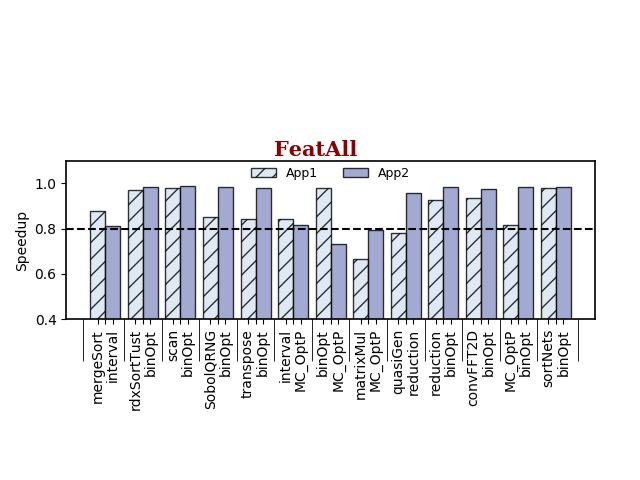

/home/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1298: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1303: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


In [21]:
# prev running app
app1_featall = [
0.8767211236,
0.9704319114,
0.9791353712,
0.8520418516,
0.8406370226,
0.8411397165,
0.9783721195,
0.666846112,
0.779621395,
0.9267418426,
0.934295731,
0.8160711901,
0.9792130661
]



# coming app
app2_featall = [
0.8124758992,
0.9856576265,
0.9904914542,
0.9851790971,
0.9786693502,
0.8168405648,
0.7311083123,
0.7952054795,
0.9575260288,
0.9854541005,
0.9761966992,
0.985442796,
0.9824374809
]

xlbls_featall = [
'mergeSort','', 'interval',
'rdxSortTust','', 'binOpt',
'scan','', 'binOpt',
'SobolQRNG','', 'binOpt',
'transpose','', 'binOpt',
'interval','', 'MC_OptP',
'binOpt','', 'MC_OptP',
'matrixMul','', 'MC_OptP',
'quasiGen','', 'reduction',
'reduction','', 'binOpt',
'convFFT2D','', 'binOpt',
'MC_OptP','', 'binOpt',
'sortNets','', 'binOpt'
]

#-----
# plot
#-----
genBar(app1_featall, app2_featall, xlbls_featall, figname="FeatAll_speedup", title="FeatAll")

### feat09

<IPython.core.display.Javascript object>


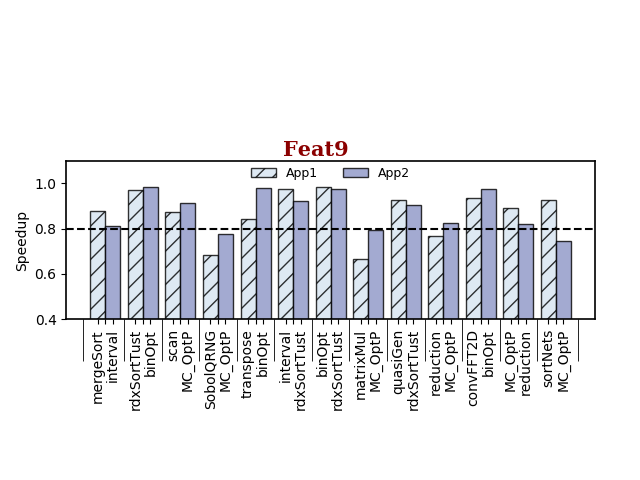

In [22]:
xlbls_feat09 = [
'mergeSort',   '', 'interval',
'rdxSortTust', '', 'binOpt', 
'scan',        '', 'MC_OptP',
'SobolQRNG',   '', 'MC_OptP',
'transpose',   '', 'binOpt',
'interval',    '', 'rdxSortTust',
'binOpt',      '', 'rdxSortTust',
'matrixMul',   '', 'MC_OptP',
'quasiGen',    '', 'rdxSortTust',
'reduction',   '', 'MC_OptP',
'convFFT2D',   '', 'binOpt',
'MC_OptP',     '', 'reduction',
'sortNets',    '', 'MC_OptP'
]


app1_feat09 = [
0.8767211236,
0.9704319114,
0.8738940985,
0.6833390123,
0.8406370226,
0.9752421959,
0.9856425476,
0.666846112,
0.9257536951,
0.7695553599,
0.934295731,
0.8905627958,
0.9265672615
]


app2_feat09 = [
0.8124758992,
0.9856576265,
0.9134539732,
0.7762407483,
0.9786693502,
0.9242215834,
0.9740506727,
0.7952054795,
0.9050086618,
0.8241816749,
0.9761966992,
0.8194017819,
0.7463022363
]


genBar(app1_feat09, app2_feat09, xlbls_feat09, figname="Feat09_speedup", title="Feat9")

### feat12

<IPython.core.display.Javascript object>


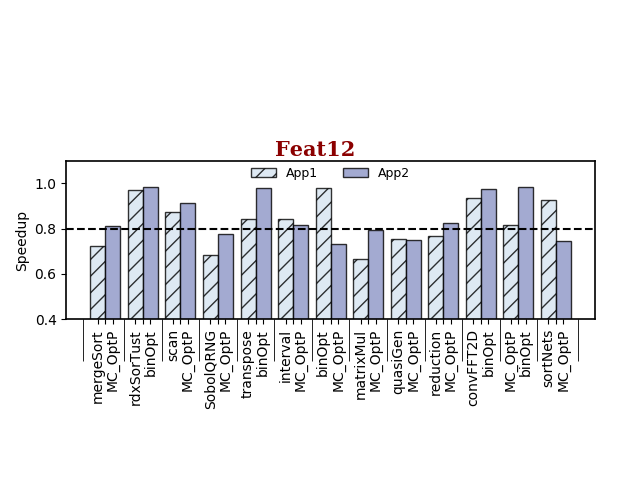

In [23]:
xlbls_feat12 = [
'mergeSort',    '',  'MC_OptP',
'rdxSorTust',   '',  'binOpt',
'scan',         '',  'MC_OptP',
'SobolQRNG',    '',  'MC_OptP',
'transpose',    '',  'binOpt',
'interval',     '',  'MC_OptP',
'binOpt',       '',  'MC_OptP',
'matrixMul',    '',  'MC_OptP',
'quasiGen',     '',  'MC_OptP',
'reduction',    '',  'MC_OptP',
'convFFT2D',    '',  'binOpt',
'MC_OptP',      '',  'binOpt',
'sortNets',     '',  'MC_OptP'
]


app1_feat12 = [
0.7222763773,
0.9704319114,
0.8738940985,
0.6833390123,
0.8406370226,
0.8411397165,
0.9783721195,
0.666846112,
0.7542755884,
0.7695553599,
0.934295731,
0.8160711901,
0.9265672615
]

app2_feat12 = [
0.8118881119,
0.9856576265,
0.9134539732,
0.7762407483,
0.9786693502,
0.8168405648,
0.7311083123,
0.7952054795,
0.7479079835,
0.8241816749,
0.9761966992,
0.985442796,
0.7463022363
]


genBar(app1_feat12, app2_feat12, xlbls_feat12, figname="Feat12_speedup", title="Feat12")

### feat14

<IPython.core.display.Javascript object>


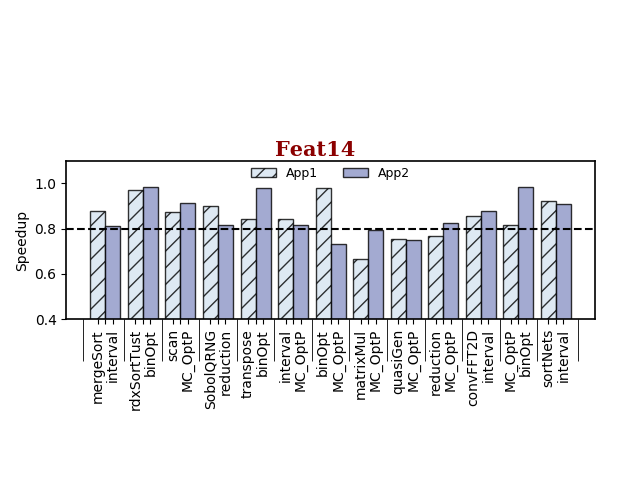

In [24]:
xlbls_feat14 = [
'mergeSort',    '', 'interval',
'rdxSortTust',  '', 'binOpt',
'scan',         '', 'MC_OptP',
'SobolQRNG',    '', 'reduction',
'transpose',    '', 'binOpt',
'interval',     '', 'MC_OptP',
'binOpt',       '', 'MC_OptP',
'matrixMul',    '', 'MC_OptP',
'quasiGen',     '', 'MC_OptP',
'reduction',    '', 'MC_OptP',
'convFFT2D',    '', 'interval',
'MC_OptP',      '', 'binOpt',
'sortNets',     '', 'interval'
]


app1_feat14 = [
0.8767211236,
0.9704319114,
0.8738940985,
0.8981751337,
0.8406370226,
0.8411397165,
0.9783721195,
0.666846112,
0.7542755884,
0.7695553599,
0.8565083135,
0.8160711901,
0.9236694678
]


app2_feat14 = [
0.8124758992,
0.9856576265,
0.9134539732,
0.817089526,
0.9786693502,
0.8168405648,
0.7311083123,
0.7952054795,
0.7479079835,
0.8241816749,
0.8775300016,
0.985442796,
0.9067042069
]

genBar(app1_feat14, app2_feat14, xlbls_feat14, figname="Feat14_speedup",title="Feat14")


### feat18

<IPython.core.display.Javascript object>


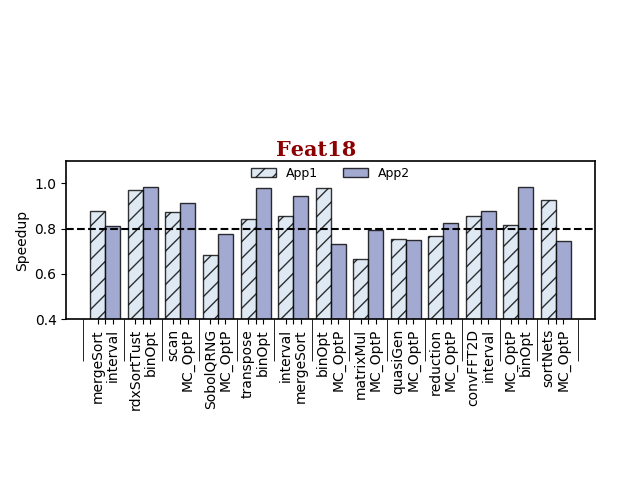

In [25]:
xlbls_feat18 = [
'mergeSort',    '',  'interval',
'rdxSortTust',  '',  'binOpt',
'scan',         '',  'MC_OptP',
'SobolQRNG',    '',  'MC_OptP',
'transpose',    '',  'binOpt',
'interval',     '',  'mergeSort',
'binOpt',       '',  'MC_OptP',
'matrixMul',    '',  'MC_OptP',
'quasiGen',     '',  'MC_OptP',
'reduction',    '',  'MC_OptP',
'convFFT2D',    '',  'interval',
'MC_OptP',      '',  'binOpt',
'sortNets',     '',  'MC_OptP'
]


app1_feat18 = [
0.8767211236,
0.9704319114,
0.8738940985,
0.6833390123,
0.8406370226,
0.8568726356,
0.9783721195,
0.666846112,
0.7542755884,
0.7695553599,
0.8565083135,
0.8160711901,
0.9265672615
]


app2_feat18 = [
0.8124758992,
0.9856576265,
0.9134539732,
0.7762407483,
0.9786693502,
0.9423953277,
0.7311083123,
0.7952054795,
0.7479079835,
0.8241816749,
0.8775300016,
0.985442796,
0.7463022363
]

genBar(app1_feat18, app2_feat18, xlbls_feat18, figname="Feat18_speedup", title="Feat18")

### feat26

<IPython.core.display.Javascript object>


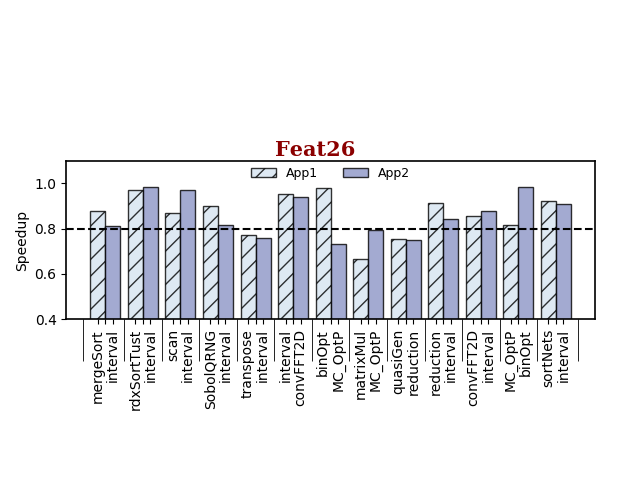

In [26]:
xlbls_feat26 = [
'mergeSort',      '',    'interval',
'rdxSortTust',    '',    'interval',
'scan',           '',    'interval',
'SobolQRNG',      '',    'interval',
'transpose',      '',    'interval',
'interval',       '',    'convFFT2D',
'binOpt',         '',    'MC_OptP',
'matrixMul',      '',    'MC_OptP',
'quasiGen',       '',    'reduction',
'reduction',      '',    'interval',
'convFFT2D',      '',    'interval',
'MC_OptP',        '',    'binOpt',
'sortNets',       '',    'interval'

]


app1_feat26 = [
0.8767211236,
0.9704319114,
0.8692280059,
0.8981751337,
0.7721389847,
0.9550245959,
0.9783721195,
0.666846112,
0.7542755884,
0.9144554924,
0.8565083135,
0.8160711901,
0.9236694678
]


app2_feat26 = [
0.8124758992,
0.9856576265,
0.9717554523,
0.817089526,
0.7600671141,
0.9392352532,
0.7311083123,
0.7952054795,
0.7479079835,
0.8425294482,
0.8775300016,
0.985442796,
0.9067042069
]

genBar(app1_feat26, app2_feat26, xlbls_feat26, figname="Feat26_speedup", title="Feat26")

### feat42

<IPython.core.display.Javascript object>


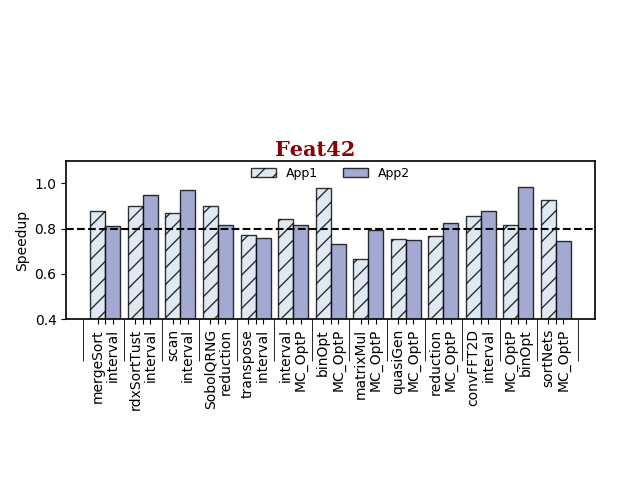

In [27]:
xlbls_feat42 = [
'mergeSort',     '',  'interval',
'rdxSortTust',   '',  'interval',
'scan',          '',  'interval',
'SobolQRNG',     '',  'reduction',
'transpose',     '',  'interval',
'interval',      '',  'MC_OptP',
'binOpt',        '',  'MC_OptP',
'matrixMul',     '',  'MC_OptP',
'quasiGen',      '',  'MC_OptP',
'reduction',     '',  'MC_OptP',
'convFFT2D',     '',  'interval',
'MC_OptP',       '',  'binOpt',
'sortNets',      '',  'MC_OptP'
]


app1_feat42 = [
0.8767211236,
0.9010419698,
0.8692280059,
0.8981751337,
0.7721389847,
0.8411397165,
0.9783721195,
0.666846112,
0.7542755884,
0.7695553599,
0.8565083135,
0.8160711901,
0.9265672615
]


app2_feat42 = [
0.8124758992,
0.9486910995,
0.9717554523,
0.817089526,
0.7600671141,
0.8168405648,
0.7311083123,
0.7952054795,
0.7479079835,
0.8241816749,
0.8775300016,
0.985442796,
0.7463022363
]

genBar(app1_feat42, app2_feat42, xlbls_feat42, figname="Feat42_speedup", title="Feat42")

### feat64

<IPython.core.display.Javascript object>


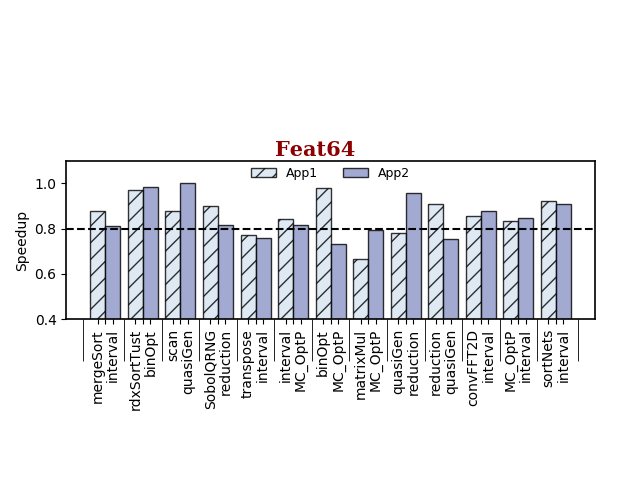

In [28]:
xlbls_feat64 = [
'mergeSort',   '', 'interval',
'rdxSortTust', '', 'binOpt',
'scan',        '', 'quasiGen',
'SobolQRNG',    '', 'reduction',
'transpose',    '', 'interval',
'interval',     '', 'MC_OptP',
'binOpt',       '', 'MC_OptP',
'matrixMul',    '', 'MC_OptP',
'quasiGen',    '', 'reduction',
'reduction',   '', 'quasiGen',
'convFFT2D',   '', 'interval',
'MC_OptP',     '', 'interval',
'sortNets',    '', 'interval'
]


app1_feat64 = [
0.8767211236,
0.9704319114,
0.8773911977,
0.8981751337,
0.7721389847,
0.8411397165,
0.9783721195,
0.666846112,
0.7796213956,
0.9095759962,
0.8565083135,
0.8348493891,
0.9236694678
]


app2_feat64 = [
0.8124758992,
0.9856576265,
1,
0.817089526,
0.7600671141,
0.8168405648,
0.7311083123,
0.7952054795,
0.9575260288,
0.752909232,
0.8775300016,
0.8470799428,
0.9067042069
]

genBar(app1_feat64, app2_feat64, xlbls_feat64, figname="Feat64_speedup", title="Feat64")


### featMystic


<IPython.core.display.Javascript object>


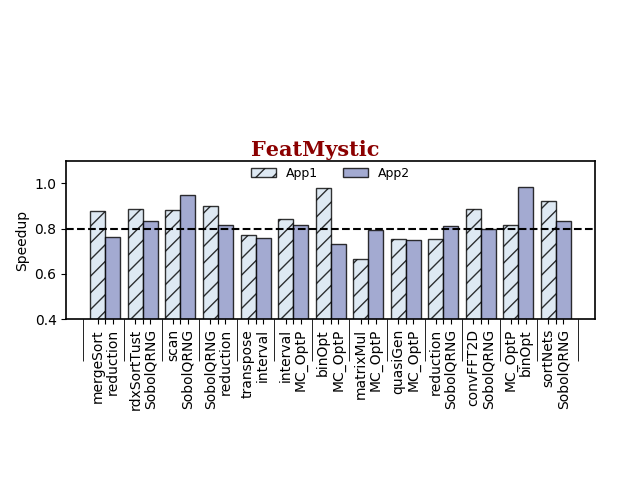

In [29]:
xlbls_mystic = [
'mergeSort',      '',    'reduction',
'rdxSortTust',    '',    'SobolQRNG',
'scan',           '',    'SobolQRNG',
'SobolQRNG',      '',    'reduction',
'transpose',      '',    'interval',
'interval',       '',    'MC_OptP',
'binOpt',         '',    'MC_OptP',
'matrixMul',      '',    'MC_OptP',
'quasiGen',       '',    'MC_OptP',
'reduction',      '',    'SobolQRNG',
'convFFT2D',      '',    'SobolQRNG',
'MC_OptP',        '',    'binOpt',
'sortNets',       '',    'SobolQRNG'
]


app1_mystic = [
0.8801489349,
0.8880854229,
0.8824557307,
0.8981751337,
0.7721389847,
0.8411397165,
0.9783721195,
0.666846112,
0.7542755884,
0.75324883,
0.8854684549,
0.8160711901,
0.9221622362
]


app2_mystic = [
0.7652862696,
0.8323391128,
0.9480290405,
0.817089526,
0.7600671141,
0.8168405648,
0.7311083123,
0.7952054795,
0.7479079835,
0.8097665925,
0.7964848844,
0.985442796,
0.8350963331
]

genBar(app1_mystic, app2_mystic, xlbls_mystic, figname="FeatMystic_speedup", title="FeatMystic")

### Best Cases

In [30]:
# xlbls_best = [
# 'mergeSort',      '',    'binOpt',
# 'rdxSortTust',    '',    'binOpt',
# 'scan',           '',    'binOpt',
# 'SobolQRNG',      '',    'scan',
# 'transpose',      '',    'rdxSortTust',
# 'interval',       '',    'rdxSortTust',
# 'binOpt',         '',    'sortNets',
# 'matrixMul',      '',    'rdxSortTust',
# 'quasiGen',       '',    'sortNets',
# 'reduction',      '',    'binOpt',
# 'convFFT2D',      '',    'binOpt',
# 'MC_OptP',        '',    'rdxSortTust',
# 'sortNets',       '',    'binOpt'
# ]


# app1_best = [
# 0.7320029823988203, 
# 0.9253828029603812, 
# 0.8819697221760108, 
# 0.7212174921499765, 
# 0.7077078219837509, 
# 0.9000790458597002, 
# 0.9847319347319348, 
# 0.6753055617851536, 
# 0.7547936620476169,
# 0.8194985875706216, 
# 0.8923237014182045,
# 0.6853885895535825,
# 0.9216894091186277
# ]


# app2_best = [
# 0.9873979860150757,
# 0.9902835241857031,
# 0.9818557915042958,
# 0.8886579413184573,
# 0.891437186429165,
# 0.8787733614968778,
# 0.9345048154209097,
# 0.915910599690197,
# 0.9356543103475998,
# 0.99049249129553,
# 0.9807654358248111,
# 0.9191990228374727,
# 0.9773392404770442
# ]

# # genBar(app1_best, app2_best, xlbls_best, figname="BeseCase_speedup", title="Best Case")
# genBar(app1_best, app2_best, xlbls_best, figname="BestCase_speedup", title="Ground Truth",
# adjustTitle = True, title_xloc = 6.5, title_yloc = 1.12)

### Performance Model

In [31]:
# xlbls_best = [
# 'mergeSort',      '',    'sortNets',
# 'rdxSortTust',    '',    'sortNets',
# 'scan',           '',    'sortNets',
# 'SobolQRNG',      '',    'scan',
# 'transpose',      '',    'sortNets',
# 'interval',       '',    'sortNets',
# 'binOpt',         '',    'transpose',
# 'matrixMul',      '',    'sortNets',
# 'quasiGen',       '',    'transpose',
# 'reduction',      '',    'sortNets',
# 'convFFT2D',      '',    'SobolQRNG',
# 'MC_OptP',        '',    'scan',
# 'sortNets',       '',    'convFFT2D'
# ]


# app1_best = [

# 0.7011137322870027, 
# 0.9242304091792654, 
# 0.882906828408792, 
# 0.7212174921499765, 
# 0.622286541244573,
# 0.8479394061573021, 
# 0.9816770655419615, 
# 0.5907691930401089, 
# 0.7022770376129389, 
# 0.8062602049678652,
# 0.8627710287559587,
# 0.6199556485460491, 
# 0.9236336854937017
# ]


# app2_best = [
# 0.9348290924396477,
# 0.9559720323835559,
# 0.9476631039295422,
# 0.8886579413184573,
# 0.9208245112653456,
# 0.9200339614944955,
# 0.6129343231685713,
# 0.9281046794081479,
# 0.6076323656739582,
# 0.9476414979114248,
# 0.5550036203209457,
# 0.8643153161671923,
# 0.9022723252335847
# ]

# genBar(app1_best, app2_best, xlbls_best, figname="PerfModel_speedup", title="Performance Model")

### Neural Nets + Interference Model

In [32]:
# xlbls_best = [
# 'mergeSort',      '',    'sortNets',
# 'rdxSortTust',    '',    'sortNets',
# 'scan',           '',    'sortNets',
# 'SobolQRNG',      '',    'scan',
# 'transpose',      '',    'sortNets',
# 'interval',       '',    'sortNets',
# 'binOpt',         '',    'reduction',
# 'matrixMul',      '',    'SobolQRNG',   
# 'quasiGen',       '',    'reduction',
# 'reduction',      '',    'sortNets',
# 'convFFT2D',      '',    'sortNets',    
# 'MC_OptP',        '',    'rdxSortTust', 
# 'sortNets',       '',    'convFFT2D'
# ]


# app1_best = [
# 0.7011137322870027, 
# 0.9242304091792654, 
# 0.882906828408792, 
# 0.7212174921499765, 
# 0.622286541244573,
# 0.8479394061573021, 
# 0.9898387953388109,
# 0.5824980957792797,
# 0.773729259002096,
# 0.8062602049678652,
# 0.905010553870828,
# 0.6853885895535825,
# 0.9236336854937017
# ]


# app2_best = [
# 0.9348290924396477,
# 0.9559720323835559,
# 0.9476631039295422,
# 0.8886579413184573,
# 0.9208245112653456,
# 0.9200339614944955,
# 0.82150012388942, 
# 0.6252786341000712,
# 0.7612890104771465,
# 0.9476414979114248,
# 0.9283104833434901,
# 0.9191990228374727,
# 0.9022723252335847
# ]

# genBar(app1_best, app2_best, xlbls_best, figname="NN_PerfModel_speedup", 
#        title="DINN + Interference Model", adjustTitle = True, title_xloc = 7.0, title_yloc = 1.12)